<a href="https://colab.research.google.com/github/saikatpythondev/cpp-project/blob/main/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Importing the essential module for the model

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
file=pd.read_csv(r"/content/ICICIBANK.csv")
df=np.array(file["High"])
time=5
##min max scaler for scaling the features
mmx=MinMaxScaler()



In [84]:
####data prepocessing

In [4]:
df=mmx.fit_transform(df.reshape(-1,1))

####Making test train split

In [5]:
train=df[:4245]
test=df[4245:]

####making the input and output batch from train data for training the LSTM

In [6]:
x_train=[]
y_train=[]
for i in range(len(train)-time-1):
    #x_train=[]
    #y_train=[]
    a=train[i:i+time,0]
    b=train[i+time+1,0]
    x_train.append(a)
    y_train.append(b)
    

#### the time step is 5 mians if i have an array{1,2,3,....18,19,20}
then first input batch will be
[1,2,3,4,5]
and first output batch=[6]
then second input batch will be :[2,3,4,5,6]
and second output batch:[7] 

In [7]:
x_train[5]
y_train[5]

0.010215893963072292

####making model using keras
```



In [8]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(5,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


fitting the model with train data

In [10]:
model.fit(np.array(x_train),np.array(y_train),epochs=10)

Epoch 1/10
133/133 [==============================] - 2s 6ms/step - loss: 0.0190
Epoch 2/10
133/133 [==============================] - 1s 6ms/step - loss: 8.5232e-04
Epoch 3/10
133/133 [==============================] - 1s 6ms/step - loss: 8.5055e-04
Epoch 4/10
133/133 [==============================] - 1s 6ms/step - loss: 8.3250e-04
Epoch 5/10
133/133 [==============================] - 1s 6ms/step - loss: 8.6508e-04
Epoch 6/10
133/133 [==============================] - 1s 6ms/step - loss: 7.8925e-04
Epoch 7/10
133/133 [==============================] - 1s 6ms/step - loss: 8.1649e-04
Epoch 8/10
133/133 [==============================] - 1s 6ms/step - loss: 7.5836e-04
Epoch 9/10
133/133 [==============================] - 1s 6ms/step - loss: 7.5663e-04
Epoch 10/10
133/133 [==============================] - 1s 6ms/step - loss: 7.3033e-04


In [11]:
test.shape

(1061, 1)

making test prediction

In [12]:
test1=test[-100:]

In [13]:
test1

array([[0.23994328],
       [0.25094056],
       [0.25765469],
       [0.25557099],
       [0.2573074 ],
       [0.25696012],
       [0.25840713],
       [0.2647161 ],
       [0.26266134],
       [0.26118539],
       [0.25817561],
       [0.25918852],
       [0.25713376],
       [0.24966719],
       [0.25180876],
       [0.25785727],
       [0.26089599],
       [0.26645251],
       [0.26772588],
       [0.2709093 ],
       [0.2700411 ],
       [0.26888349],
       [0.27174857],
       [0.27791283],
       [0.28011229],
       [0.27588702],
       [0.27525033],
       [0.27794177],
       [0.2839324 ],
       [0.28245644],
       [0.27814435],
       [0.27663946],
       [0.27626324],
       [0.28022805],
       [0.2839324 ],
       [0.27959136],
       [0.27310876],
       [0.27131446],
       [0.26590265],
       [0.27464259],
       [0.31197546],
       [0.32039706],
       [0.32242287],
       [0.32482491],
       [0.32693755],
       [0.32615616],
       [0.3315101 ],
       [0.328

In [14]:

time=5
x_test=[]
y_test=[]
for i in range(len(train)-time-1):
    #x_train=[]
    #y_train=[]
    a=test[i:i+time,0]
    #b=test[i+time+1,0]
    x_test.append(a)
    #y_test.append(b)
    

In [15]:
x_test

[array([0.11599236, 0.11636858, 0.11671587, 0.11590554, 0.11431383]),
 array([0.11636858, 0.11671587, 0.11590554, 0.11431383, 0.11075418]),
 array([0.11671587, 0.11590554, 0.11431383, 0.11075418, 0.10887307]),
 array([0.11590554, 0.11431383, 0.11075418, 0.10887307, 0.11017538]),
 array([0.11431383, 0.11075418, 0.10887307, 0.11017538, 0.11781559]),
 array([0.11075418, 0.10887307, 0.11017538, 0.11781559, 0.11874168]),
 array([0.10887307, 0.11017538, 0.11781559, 0.11874168, 0.11781559]),
 array([0.11017538, 0.11781559, 0.11874168, 0.11781559, 0.12331423]),
 array([0.11781559, 0.11874168, 0.11781559, 0.12331423, 0.12562945]),
 array([0.11874168, 0.11781559, 0.12331423, 0.12562945, 0.1241535 ]),
 array([0.11781559, 0.12331423, 0.12562945, 0.1241535 , 0.12837877]),
 array([0.12331423, 0.12562945, 0.1241535 , 0.12837877, 0.12863923]),
 array([0.12562945, 0.1241535 , 0.12837877, 0.12863923, 0.12620825]),
 array([0.1241535 , 0.12837877, 0.12863923, 0.12620825, 0.12635295]),
 array([0.12837877, 

In [16]:
x_test1=np.array(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [18]:
gg=model.predict(xx)

In [17]:
xx=x_test1[0].reshape(1,5,1)

In [19]:
gg

array([[0.12396783]], dtype=float32)

In [44]:
test_pred=[]
for i in range (1000):
  k=x_test1[i].reshape(1,5,1)
  kk=model.predict(k)
  test_pred.append(kk)


In [61]:
x_test[2][0]


0.11671586502286277

In [66]:
m=[]
for i in range(len(test_pred)):
  for j in range(5):
    l=x_test[2+i][j]
    m.append(l)

In [70]:
n=np.array(test_pred).reshape(1000,)

####visulizing the predicted test data with actual test INPUT data 

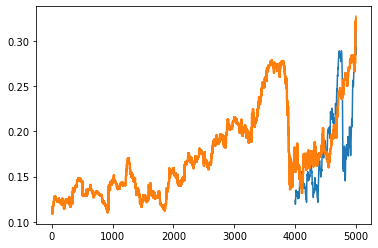

In [83]:
plt.plot(t,n)
plt.plot(m)

############THE END

In [82]:
t=np.arange(4000,5000)

In [79]:
t

array([4000, 4001, 4002, 4003, 4004, 4005, 4006, 4007, 4008, 4009, 4010,
       4011, 4012, 4013, 4014, 4015, 4016, 4017, 4018, 4019, 4020, 4021,
       4022, 4023, 4024, 4025, 4026, 4027, 4028, 4029, 4030, 4031, 4032,
       4033, 4034, 4035, 4036, 4037, 4038, 4039, 4040, 4041, 4042, 4043,
       4044, 4045, 4046, 4047, 4048, 4049, 4050, 4051, 4052, 4053, 4054,
       4055, 4056, 4057, 4058, 4059, 4060, 4061, 4062, 4063, 4064, 4065,
       4066, 4067, 4068, 4069, 4070, 4071, 4072, 4073, 4074, 4075, 4076,
       4077, 4078, 4079, 4080, 4081, 4082, 4083, 4084, 4085, 4086, 4087,
       4088, 4089, 4090, 4091, 4092, 4093, 4094, 4095, 4096, 4097, 4098,
       4099, 4100, 4101, 4102, 4103, 4104, 4105, 4106, 4107, 4108, 4109,
       4110, 4111, 4112, 4113, 4114, 4115, 4116, 4117, 4118, 4119, 4120,
       4121, 4122, 4123, 4124, 4125, 4126, 4127, 4128, 4129, 4130, 4131,
       4132, 4133, 4134, 4135, 4136, 4137, 4138, 4139, 4140, 4141, 4142,
       4143, 4144, 4145, 4146, 4147, 4148, 4149, 41